Column
    [0] Markdown(str)
    [1] Select(name='Job Class', options=['Industrial', ...], value='Industrial')
    [2] ParamFunction(function, _pane=Matplotlib, defer_load=False)
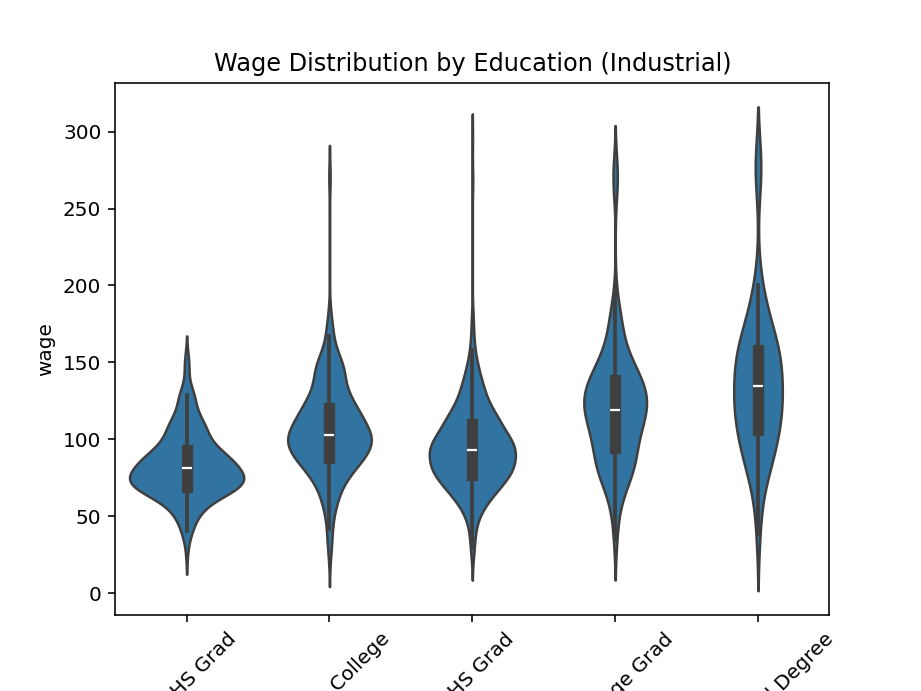

In [18]:
import panel as pn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pn.extension()

# Load and clean dataset
df = pd.read_csv(r'C:\\Users\\andre\\OIM7502_SP25\\data\\Wage.csv')
df['jobclass'] = df['jobclass'].str.replace(r'^\d+\.\s*<*\s*', '', regex=True).str.strip()

# Create dropdown for job class
jobclass_widget = pn.widgets.Select(
    name='Job Class',
    options=sorted(df['jobclass'].dropna().unique().tolist())
)

# Interactive violin plot
@pn.depends(jobclass_widget)
def kde_plot(jobclass):
    filtered = df[df['jobclass'] == jobclass]
    fig, ax = plt.subplots()
    sns.violinplot(data=filtered, x='education', y='wage', ax=ax)
    ax.set_title(f"Wage Distribution by Education ({jobclass})")
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.close(fig)
    return fig

# Panel layout
pn.Column(
    "# Wage Distribution by Education (Violin Plot)",
    jobclass_widget,
    kde_plot
).servable()
